# Assignments for "Simple Linear Regression"

In [1]:
import pandas as pd
import seaborn as sns
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<b>(1)</b> Investigate the data and do any necessary data cleaning.

In [2]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
total = house_prices_df.isnull().sum().sort_values(ascending=False)
percent = (house_prices_df.isnull().sum()/house_prices_df.isnull().count()).sort_values(ascending=False)
dtype = house_prices_df.dtypes
missing_values = pd.concat([total, percent, dtype], axis=1, keys=['Total', 'Percent', 'Data Type'])
missing_values.head(20)

,Total,Percent,Data Type
PoolQC,1453,0.995205,object
MiscFeature,1406,0.963014,object
Alley,1369,0.937671,object
Fence,1179,0.807534,object
FireplaceQu,690,0.472603,object
LotFrontage,259,0.177397,float64
GarageCond,81,0.055479,object
GarageType,81,0.055479,object
GarageYrBlt,81,0.055479,float64
GarageFinish,81,0.055479,object


In [4]:
# data types
house_prices_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
# get to know the target value
house_prices_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

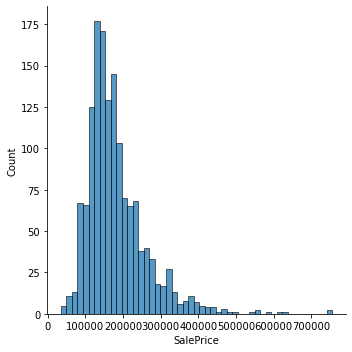

In [6]:
sns.displot(house_prices_df["SalePrice"]);

<b>(2)</b> Explore the data and find some variables that you think would be useful in the prediction of the house prices.

In [7]:
corr_values = house_prices_df.corr()
corr_list = corr_values['SalePrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list.head(10)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

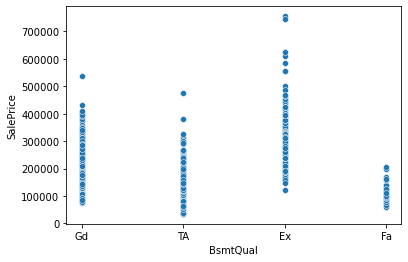

In [8]:
sns.scatterplot(x=house_prices_df["BsmtQual"],y=house_prices_df["SalePrice"]);

In [9]:
high_corr = corr_list.iloc[:3]
df = house_prices_df[high_corr.index]
df = pd.concat([house_prices_df[["SalePrice","BsmtQual","PoolQC","YearBuilt"]], df], axis=1)
df.head()

,SalePrice,BsmtQual,PoolQC,YearBuilt,OverallQual,GrLivArea,GarageCars
0,208500,Gd,NaN,2003,7,1710,2
1,181500,Gd,NaN,1976,6,1262,2
2,223500,Gd,NaN,2001,7,1786,2
3,140000,TA,NaN,1915,7,1717,3
4,250000,Gd,NaN,2000,8,2198,3


In [10]:
# missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
dtype = df.dtypes
missing_values = pd.concat([total, percent, dtype], axis=1, keys=['Total', 'Percent', 'Data Type'])
missing_values

,Total,Percent,Data Type
PoolQC,1453,0.995205,object
BsmtQual,37,0.025342,object
GarageCars,0,0.000000,int64
GrLivArea,0,0.000000,int64
OverallQual,0,0.000000,int64
YearBuilt,0,0.000000,int64
SalePrice,0,0.000000,int64


In [11]:
df["PoolQC"].fillna("None", inplace=True)
print("PoolQC missing value count:", len(df[df["PoolQC"].isnull()==True]))

PoolQC missing value count: 0


In [12]:
PoolQC_categories = ["None","Fa","TA","Gd","Ex"]
df['PoolQC'].replace(to_replace=PoolQC_categories, value=[0, 1, 2, 3, 4], inplace=True)

In [13]:
df["BsmtQual"].fillna("None", inplace=True)
print("BsmtQual missing value count:", len(df[df["BsmtQual"].isnull()==True]))

BsmtQual missing value count: 0


In [14]:
BsmtQual_categories = ["None","Fa","TA","Gd","Ex"]
df['BsmtQual'].replace(to_replace=BsmtQual_categories, value=[0, 1, 2, 3, 4], inplace=True)

In [15]:
df.head()

,SalePrice,BsmtQual,PoolQC,YearBuilt,OverallQual,GrLivArea,GarageCars
0,208500,3,0,2003,7,1710,2
1,181500,3,0,1976,6,1262,2
2,223500,3,0,2001,7,1786,2
3,140000,2,0,1915,7,1717,3
4,250000,3,0,2000,8,2198,3


In [16]:
df.to_csv('house_prices2.csv',index = False)

<b>(3)</b> Build your initial model using these features and estimate the parameters using OLS.

In [17]:
import statsmodels.api as sm

Y = df["SalePrice"]
X = df.drop('SalePrice', axis=1)

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     761.7
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        21:21:06   Log-Likelihood:                -17506.
No. Observations:                1460   AIC:                         3.503e+04
Df Residuals:                    1453   BIC:                         3.506e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.011e+05   9.46e+04     -5.297      0.000   -6.87e+05   -3.16e+05
BsmtQual     1.423e+04   1951.305      7.292      0.000    1.04e+04    1.81e+04
PoolQC        292.9174   5147.356      0.057      0.955   -9804.126    1.04e+04
YearBuilt     209.6036     49.839      4.206      0.000     111.840     307.367
OverallQual   1.97e+04   1236.194     15.934      0.000    1.73e+04    2.21e+04
GrLivArea      55.8363      2.612     21.374      0.000      50.712      60.961
GarageCars   1.602e+04   1857.932      8.621      0.000    1.24e+04    1.97e+04
==============================================================================
Omnibus:                      432.668   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14183.735
Skew:                           0.714   Prob(JB):                         0.00
Kurtosis:                      18.203   Cond. No.                     2.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""